In [1]:
import numpy as np
import matplotlib.pyplot as plt

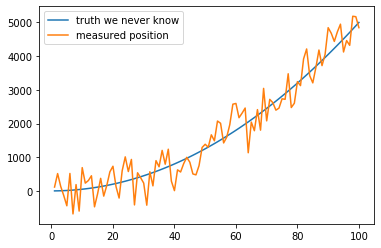

In [4]:
# simulation realer daten

t = np.linspace(1,100,100)
position = 0.5*t**2
plt.plot(t,position,label = "truth we never know")

position_measure = position +np.random.normal(0,400,size = t.shape[0])
plt.plot(t,position_measure,label="measured position")

plt.legend()
plt.show()

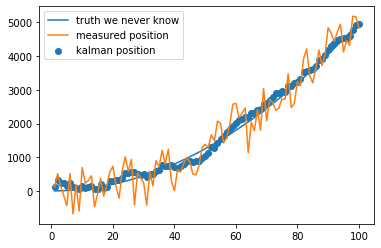

In [28]:
#kalman filter
#first predict

predicts_kalman = [position_measure[0]]
measure_var = 100
predict_var =100
position_predict = 114

Q_var = 10

for i in range (1,t.shape[0]):
    dv = position[i] - position[i-1]+np.random.normal(0,50)
    position_predict =position_predict + dv
    predict_var = predict_var + Q_var
    
    position_predict = position_predict*measure_var/(predict_var+measure_var) + position_measure[i]*predict_var/(predict_var + measure_var)
    
    predict_var = predict_var * measure_var/(predict_var + measure_var)**2
    predicts_kalman.append(position_predict)


plt.scatter(t,predicts_kalman, label="kalman position")
plt.plot(t,position,label = "truth we never know")
plt.plot(t,position_measure,label="measured position")

plt.legend()
plt.show()
